In [74]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [75]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [76]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from datetime import datetime, timedelta
import datetime as dt

In [77]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [78]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [79]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [80]:
# Save references to each table
Station=Base.classes.station
Measurement = Base.classes.measurement

In [81]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [82]:
# Find the most recent date in the data set.
most_recent_date= session.query(func.max(Measurement.date)).scalar()
most_recent_date

'2017-08-23'

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(-500.0, 0, '2017-05-18'),
  Text(0.0, 0, '2016-08-23'),
  Text(500.0, 0, '2016-11-16'),
  Text(1000.0, 0, '2017-02-13'),
  Text(1500.0, 0, '2017-05-14'),
  Text(2000.0, 0, '2017-08-17'),
  Text(2500.0, 0, '')])

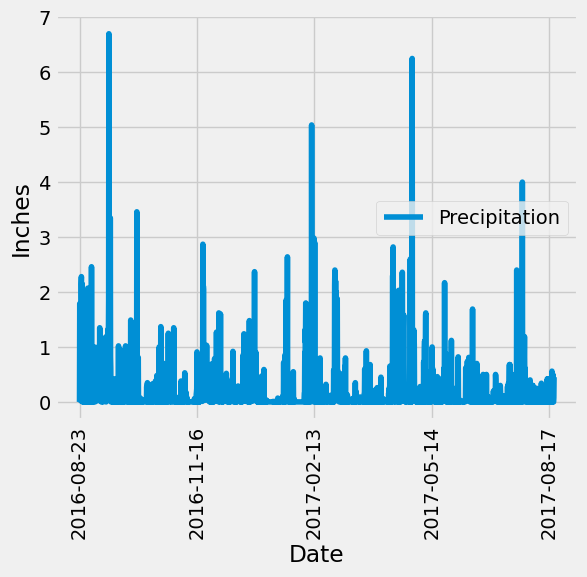

In [91]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
import datetime as dt

# Calculate the date one year from the last date in data set.

one_year_ago_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_scores= session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date>=one_year_ago_date).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df=pd.DataFrame(precipitation_scores, columns=['Date', 'Precipitation'])
# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values('Date')

# Drop rows with NaN values from the DataFrame
precipitation_df.dropna(inplace=True)

# Set the 'Date' column as the index
precipitation_df.set_index('Date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(xlabel="Date",ylabel="Inches",figsize=(6, 5))
plt.xticks(rotation=90)



In [84]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [85]:
# Design a query to calculate the total number of stations in the dataset
station_count=session.query(func.count(Station.station)).first()
print(f'[{station_count}]')

[(9,)]


In [86]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_station_count=session.query(Measurement.station,func.count(Measurement.station)).\
                          group_by(Measurement.station).\
                          order_by(func.count(Measurement.station).desc()).all()
most_active_station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [87]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperature = session.query(func.min(Measurement.tobs),
              func.max(Measurement.tobs),
              func.avg(Measurement.tobs)).\
              filter(Measurement.station =='USC00519281').first()
temperature

(54.0, 85.0, 71.66378066378067)

Text(0.5, 0, 'Temperature')

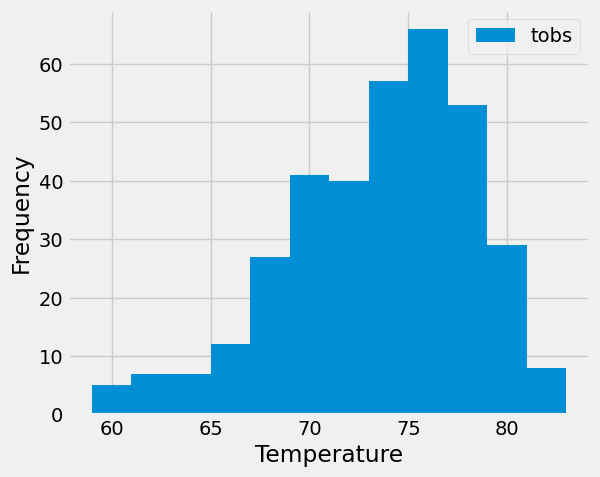

In [88]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
observation_data = session.query(Measurement.tobs).filter(Measurement.station =='USC00519281').\
                    filter(Measurement.date >=one_year_ago_date).all()
observation_data_df=pd.DataFrame(observation_data, columns=["tobs"])
observation_data_df.plot.hist(bins=12, figsize = (6,5))
plt.xlabel("Temperature")

# Close Session

In [89]:
# Close Session
session.close()